# SENG 474 A02: Assignment 1
## Decision Tree Classifiers (With Post-Pruning)
Sean McAuliffe, V00913346  
February 3, 2023

---
## Environment Setup

This step installs the project requirements and imports modules used for implementation.

In [2]:
# !pip3 install numpy
# !pip3 install pandas
# !pip3 install sklearn
# !pip3 install matplotlib
# !pip3 install graphviz

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

---
## Data Preprocessing
This block is to load in the cleaned_adult.csv file, to shuffle the examlples, and to partition the data into training + test sets.

In [3]:
# Importing the dataset from .csv
print("Importing the income dataset...\n")
income_dataset = np.genfromtxt('./cleaned_adult.csv', delimiter=',', skip_header=1, dtype=int)

def split_dataset(training_percent):
    """ Split the dataset into training and testing sets """
    np.random.shuffle(income_dataset)
    features = income_dataset[:, :-1]
    labels = income_dataset[:, -1]
    training_features = features[:int(training_percent * features.shape[0])]
    training_labels = labels[:int(training_percent * labels.shape[0])]
    testing_features = features[int(training_percent * features.shape[0]):]
    testing_labels = labels[int(training_percent * labels.shape[0]):]
    return training_features, training_labels, testing_features, testing_labels

# Split the dataset into training and testing sets
# With 80% of the data in the training set and 20% in the testing set
training_features, training_labels, testing_features, testing_labels = split_dataset(0.8)


print("Training Features:")
print(f"  Num. dimensions: {training_features.ndim}")
print(f"  Data shape: {training_features.shape}")
print(f"  Size: {training_features.size}\n")

print("Training Labels:")
print(f"  Num. dimensions: {training_labels.ndim}")
print(f"  Data shape: {training_labels.shape}")
print(f"  Size: {training_labels.size}\n")

print("Testing Features:")
print(f"  Num. dimensions: {testing_features.ndim}")
print(f"  Data shape: {testing_features.shape}")
print(f"  Size: {testing_features.size}\n")

print("Testing Labels:")
print(f"  Num. dimensions: {testing_labels.ndim}")
print(f"  Data shape: {testing_labels.shape}")
print(f"  Size: {testing_labels.size}\n")

# Extract the featrue names from the first row of the dataset
feature_names = np.genfromtxt('./cleaned_adult.csv', delimiter=',', max_rows=1, dtype=str)[:-1]
label_names = ['poor', 'rich']

Importing the income dataset...

Training Features:
  Num. dimensions: 2
  Data shape: (36177, 104)
  Size: 3762408

Training Labels:
  Num. dimensions: 1
  Data shape: (36177,)
  Size: 36177

Testing Features:
  Num. dimensions: 2
  Data shape: (9045, 104)
  Size: 940680

Testing Labels:
  Num. dimensions: 1
  Data shape: (9045,)
  Size: 9045



---
### Decision Trees (With Pruning)
1. Decision Tree: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
2. Post process pruning: https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py

In [ ]:
# Sample Decision Tree Code
# A decision tree classifier listing all available parameters
dtc = DecisionTreeClassifier(criterion="gini",              # gini, entropy, log_loss
                             splitter="best",               # best, random
                             max_depth=4,                   # default None
                             min_samples_split=2,           # default 2
                             min_samples_leaf=1,            # default 1
                             min_weight_fraction_leaf=0.0,  # default 0.0
                             max_features=None,             # default None
                             random_state=None,             # default None
                             max_leaf_nodes=None,           # default None
                             min_impurity_decrease=0.0,     # default 0.0
                             class_weight=None,             # default None
                             ccp_alpha=0.0)                 # default 0.0

# Fit the model to the training data
model = dtc.fit(training_features, training_labels)
# Print the accuracy of the model on the testing data
print("Accuracy: {:.2f}%".format(model.score(testing_features, testing_labels) * 100))

# Visualize the tree classifier using graphviz
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=feature_names,
                                class_names=["poor","rich"],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Experiment 1: Accuracy vs. Max Depth

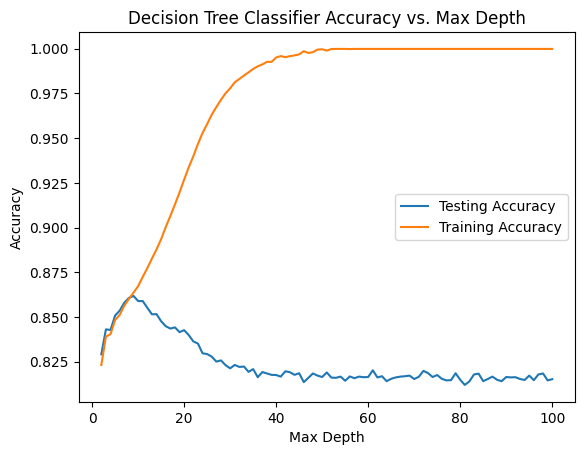

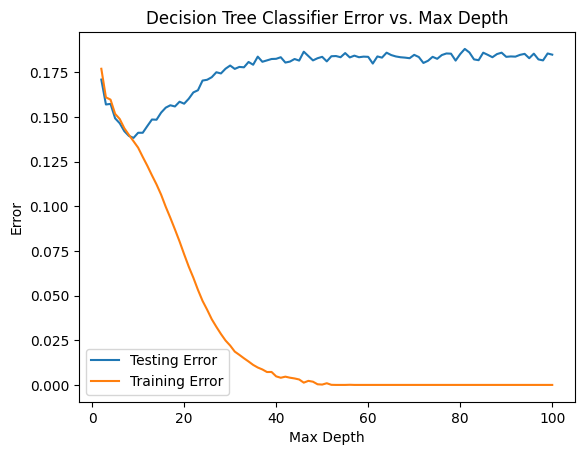

In [4]:
# Experiment 1
# 80% Trainin, 20% Testing
# Vary max_depth from [2, 3, ... 100], store the accuracy for each value

# Create a list of decision tree classifiers with different max_depth values
# Keeping all other parameters at their default values

X_train, y_train, X_test, y_test = split_dataset(0.8)

dtc_list = []
for i in range(2, 101):
    dtc_list.append(DecisionTreeClassifier(
                            criterion="gini",           # gini, entropy, log_loss
                            splitter="best",               # best, random
                            max_depth=i,                   # default None
                            min_samples_split=2,           # default 2
                            min_samples_leaf=1,            # default 1
                            min_weight_fraction_leaf=0.0,  # default 0.0
                            max_features=None,             # default None
                            random_state=None,             # default None
                            max_leaf_nodes=None,           # default None
                            min_impurity_decrease=0.0,     # default 0.0
                            class_weight=None,             # default None
                            ccp_alpha=0.0)                 # default 0.0
                    )

# Train each decision tree classifier on the training data
for i in range(len(dtc_list)):
    dtc_list[i].fit(X_train, y_train)

# Measure the accuracy of each decision tree classifier on the testing data
accuracy_list = []
for i in range(len(dtc_list)):
    accuracy_list.append(dtc_list[i].score(X_test, y_test))

# Measure the accuracy of each decision tree classifier against the training data
training_accuracy_list = []
for i in range(len(dtc_list)):
    training_accuracy_list.append(dtc_list[i].score(X_train, y_train))

# Plot both testing and training accuracy  of each classifier against max_depth
plt.plot(range(2, 101), accuracy_list, label="Testing Accuracy")
plt.plot(range(2, 101), training_accuracy_list, label="Training Accuracy")
plt.title("Decision Tree Classifier Accuracy vs. Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Convert accuracy into error
error_list = [1 - accuracy for accuracy in accuracy_list]
training_error_list = [1 - accuracy for accuracy in training_accuracy_list]

# Plot the error graph
plt.plot(range(2, 101), error_list, label="Testing Error")
plt.plot(range(2, 101), training_error_list, label="Training Error")
plt.title("Decision Tree Classifier Error vs. Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Error")
plt.legend()
plt.show()

The above result clearly shows a typical overfitting pattern. To combat overfitting we will use minial-cost complexity pruning as a post-training step. We will graph the performance of the pruned classifiers below.

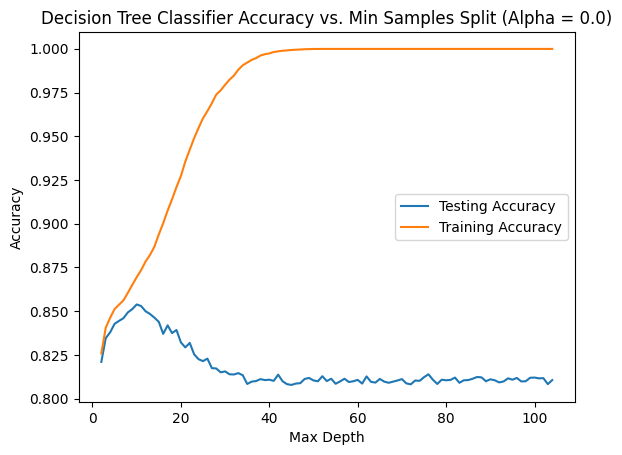

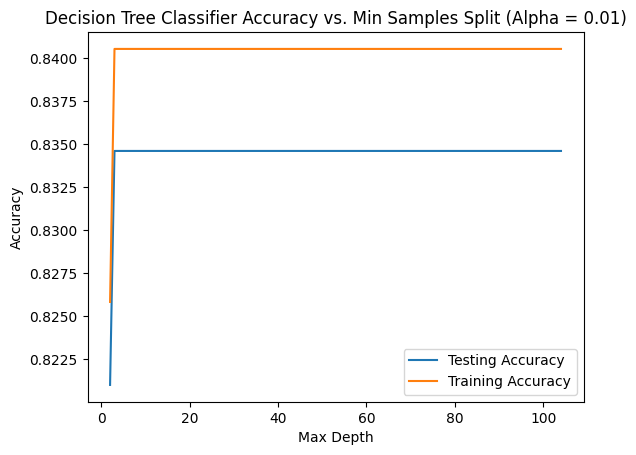

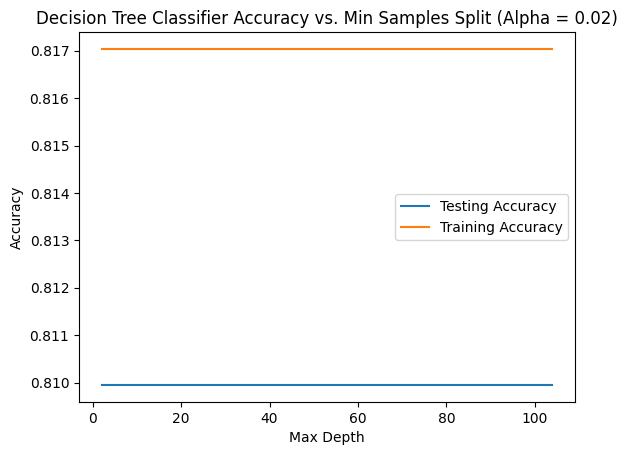

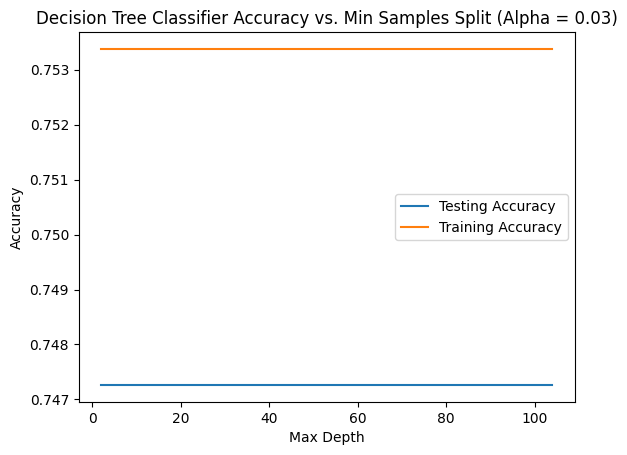

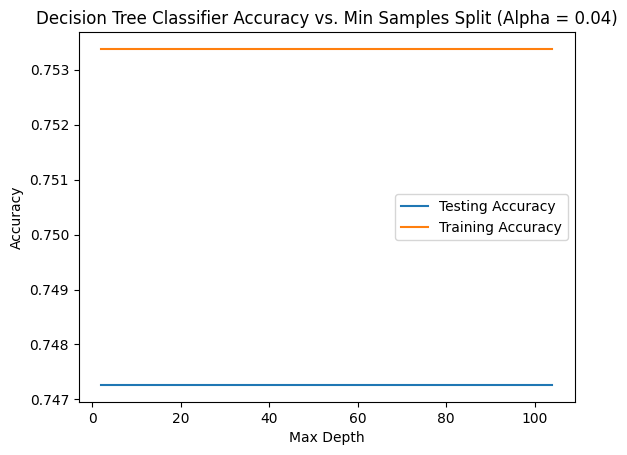

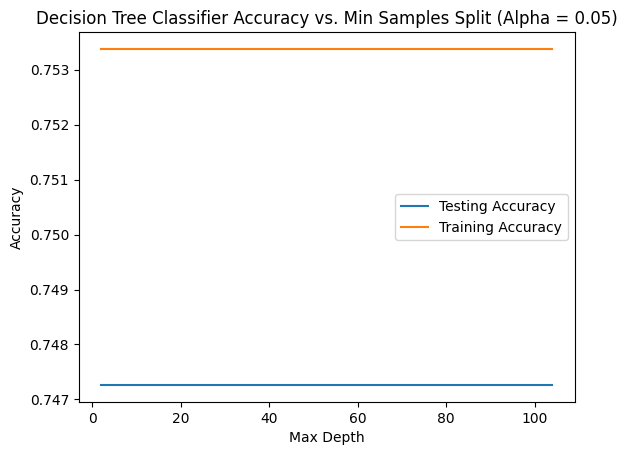

In [29]:
# Experiment 2
# 80% Trainin, 20% Testing
# Vary min_samples_split from [2, 3, ... 104], store the accuracy for each value
# Use minimal cost complexity pruning as a post-pruning method to avoid overfitting

# Create a list of decision tree classifiers with different max_depth values
# Keeping all other parameters at their default values
# Use minimal cost complexity pruning as a post-pruning method to avoid overfitting
# We will use several values for ccp_alpha to prune the tree and see how it affects the accuracy
# We will use values in [0.0, 0.01, 0.02, 0.03, 0.04, 0.05]

dtc_alpha_list = []
alphas = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05]
for i in range(6):
    dtc_list = []
    for j in range(2, 105):
        dtc_list.append(DecisionTreeClassifier(
                                criterion="gini",              # gini, entropy, log_loss
                                splitter="best",               # best, random
                                max_depth=j,                # default None
                                min_samples_split=2,           # default 2
                                min_samples_leaf=1,            # default 1
                                min_weight_fraction_leaf=0.0,  # default 0.0
                                max_features=None,             # default None
                                random_state=None,             # default None
                                max_leaf_nodes=None,           # default None
                                min_impurity_decrease=0.0,     # default 0.0
                                class_weight=None,             # default None
                                ccp_alpha=alphas[i])                 # default 0.0
                        )
    dtc_alpha_list.append(dtc_list)

# For each of the alpha values, train the classifiers
for i in range(len(dtc_alpha_list)):
    for j in range(len(dtc_alpha_list[i])):
        dtc_alpha_list[i][j].fit(training_features, training_labels)

# For each of the alpha values, measure the accuracy of each decision tree classifier on the testing data
accuracy_alpha_list = []
for i in range(len(dtc_alpha_list)):
    accuracy_list = []
    for j in range(len(dtc_alpha_list[i])):
        accuracy_list.append(dtc_alpha_list[i][j].score(testing_features, testing_labels))
    accuracy_alpha_list.append(accuracy_list)

# For each of the alpha values, measure the accuracy of each decision tree classifier against the training data
training_accuracy_alpha_list = []
for i in range(len(dtc_alpha_list)):
    training_accuracy_list = []
    for j in range(len(dtc_alpha_list[i])):
        training_accuracy_list.append(dtc_alpha_list[i][j].score(training_features, training_labels))
    training_accuracy_alpha_list.append(training_accuracy_list)

# Plot both testing and training accuracy  of each classifier against min_samples_split
# For each alpha value, plot the accuracy
for i in range(len(accuracy_alpha_list)):
    plt.plot(range(2, 105), accuracy_alpha_list[i], label="Testing Accuracy")
    plt.plot(range(2, 105), training_accuracy_alpha_list[i], label="Training Accuracy")
    plt.title("Decision Tree Classifier Accuracy vs. Min Samples Split (Alpha = " + str(alphas[i]) + ")")
    plt.xlabel("Max Depth")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()


# # Train each decision tree classifier on the training data
# for i in range(len(dtc_list)):
#     dtc_list[i].fit(training_features, training_labels)

# # Measure the accuracy of each decision tree classifier on the testing data
# accuracy_list = []
# for i in range(len(dtc_list)):
#     accuracy_list.append(dtc_list[i].score(testing_features, testing_labels))

# # Measure the accuracy of each decision tree classifier against the training data
# training_accuracy_list = []
# for i in range(len(dtc_list)):
#     training_accuracy_list.append(dtc_list[i].score(training_features, training_labels))



The above test is probably not meaningful, I have decided to allow the tree depth to grow arbitrarily, and vary only alpha; rather than trying to vary both depth and alpha simultaneously.

Best alpha value: 0.0002
Node count: 107
Depth: 12
Node count without pruning: 10831
Depth wihtout pruning: 54


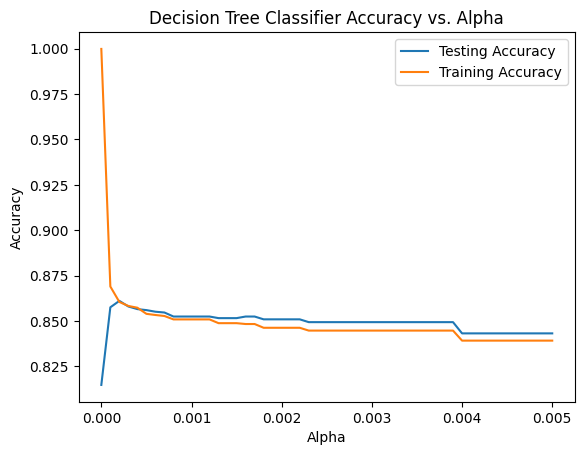

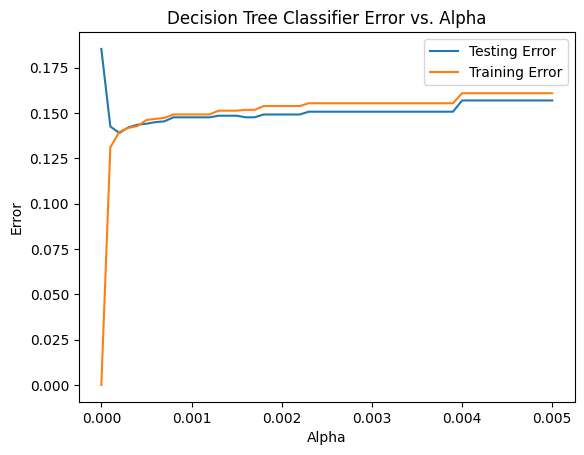

In [5]:
# Experiment 2-B (or not 2-B)
# 80% Trainin, 20% Testing
# Allow the tree depth to grow arbitrarily
# Use minimal cost complexity pruning as a post-pruning method to avoid overfitting
# Plot the model accuracy against the value of alpha used in the pruning

X_train, y_train, X_test, y_test = split_dataset(0.8)

alpha_values = [0.0001*x for x in range(0, 51)]

dtc_list = []
for a in alpha_values:
    dtc_list.append(DecisionTreeClassifier(
                            criterion="gini",              # gini, entropy, log_loss
                            splitter="best",               # best, random
                            max_depth=None,                # default None
                            min_samples_split=2,           # default 2
                            min_samples_leaf=1,            # default 1
                            min_weight_fraction_leaf=0.0,  # default 0.0
                            max_features=None,             # default None
                            random_state=None,             # default None
                            max_leaf_nodes=None,           # default None
                            min_impurity_decrease=0.0,     # default 0.0
                            class_weight=None,             # default None
                            ccp_alpha=a)                   # default 0.0
                    )

# Train each decision tree classifier on the training data
for i in range(len(dtc_list)):
    dtc_list[i].fit(X_train, y_train)

# Measure the accuracy of each decision tree classifier on the testing data
accuracy_list = []
for i in range(len(dtc_list)):
    accuracy_list.append(dtc_list[i].score(X_test, y_test))

# Find the best alpha value
best_alpha = alpha_values[accuracy_list.index(max(accuracy_list))]
print("Best alpha value: " + str(best_alpha))

# The node count at the best alpha is
best_alpha_node_count = dtc_list[accuracy_list.index(max(accuracy_list))].tree_.node_count
print("Node count: " + str(best_alpha_node_count))

# The depth of the tree at the best alpha is
best_alpha_depth = dtc_list[accuracy_list.index(max(accuracy_list))].tree_.max_depth
print("Depth: " + str(best_alpha_depth))

# The node count and depth of the tree when alpha was 0
node_count = dtc_list[0].tree_.node_count
depth = dtc_list[0].tree_.max_depth
print("Node count without pruning: " + str(node_count))
print("Depth wihtout pruning: " + str(depth))

# Measure the accuracy of each decision tree classifier against the training data
training_accuracy_list = []
for i in range(len(dtc_list)):
    training_accuracy_list.append(dtc_list[i].score(X_train, y_train))

# Plot both testing and training accuracy  of each classifier against min_samples_split
plt.plot(alpha_values, accuracy_list, label="Testing Accuracy")
plt.plot(alpha_values, training_accuracy_list, label="Training Accuracy")
plt.title("Decision Tree Classifier Accuracy vs. Alpha")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Convert the accuracy metrics to error
error_list = [1 - x for x in accuracy_list]
training_error_list = [1 - x for x in training_accuracy_list]

# Plot the error of each classifier against alpha
plt.plot(alpha_values, error_list, label="Testing Error")
plt.plot(alpha_values, training_error_list, label="Training Error")
plt.title("Decision Tree Classifier Error vs. Alpha")
plt.xlabel("Alpha")
plt.ylabel("Error")
plt.legend()
plt.show()


The results appear to show that with no pruning (alpha = 0), the model is overfit; as evidenced by the 100% training accuracy, and lower test accuracy. Optimal test accuracy is reached at 0.00001, where the resulting tree has 231 nodes, and a depth of 20. The benefit of further pruning falls off, and reaches a platea which continues for up to values of alpha = 0.5 (in earlier testing).  

This represents a huge improvement in terms of performance as well, as the original tree without pruning had 10577 nodes!

[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]


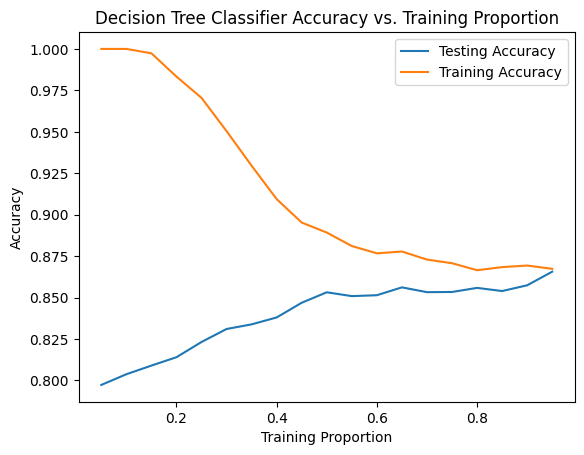

In [43]:
# Experiment 3
# Varying the proportion of training data which is used to train the model
# The proportion of training data will be varied from 5% to 95% in 5% increments
# The testing data will be the remaining data not used for training, varying from
# 95% to 5% in 5% increments. 
# The resulting accuracy will be plotted against these proportions

class DataSet:
    def __init__(self, X_train, y_train, X_test, y_test):
        self.train_features = X_train
        self.train_labels = y_train
        self.test_features = X_test
        self.test_labels = y_test

# The proportion of training data, 5% increments
training_proportions = [0.05*x for x in range(1, 20)]

# Round each of the training proportions to 2 decimal places
for i in range(len(training_proportions)):
    training_proportions[i] = round(training_proportions[i], 2)


# Partition the input data according to the training_proportions
data_sets = []
for p in training_proportions:
    X_train, y_train, X_test, y_test = split_dataset(p)
    data_sets.append(DataSet(X_train, y_train, X_test, y_test))

print(training_proportions)

# Train a decision tree classifier on each of the datasets
# We will use the optimal pruning parameters from experiment 2-B
# All other parameters will be left at their default values
dtc_list = []
for i in range(len(data_sets)):
    dtc_list.append(DecisionTreeClassifier(
                                    criterion="gini",              # gini, entropy, log_loss
                                    splitter="best",               # best, random
                                    max_depth= None,               # default None
                                    min_samples_split=2,           # default 2
                                    min_samples_leaf=1,            # default 1
                                    min_weight_fraction_leaf=0.0,  # default 0.0
                                    max_features=None,             # default None
                                    random_state=None,             # default None
                                    max_leaf_nodes=None,           # default None
                                    min_impurity_decrease=0.0,     # default 0.0
                                    class_weight=None,             # default None
                                    ccp_alpha=0.0001)              # default 0.0
                    )
    dtc_list[i].fit(data_sets[i].train_features, data_sets[i].train_labels)

# Measure the accuracy of each decision tree classifier on the testing data
accuracy_list = []
for i in range(len(dtc_list)):
    accuracy_list.append(dtc_list[i].score(data_sets[i].test_features, data_sets[i].test_labels))

# Measure the accuracy of each classifier on the training data
training_accuracy_list = []
for i in range(len(dtc_list)):
    training_accuracy_list.append(dtc_list[i].score(data_sets[i].train_features, data_sets[i].train_labels))

# Plot both testing and training accuracy  of each classifier against min_samples_split
plt.plot(training_proportions, accuracy_list, label="Testing Accuracy")
plt.plot(training_proportions, training_accuracy_list, label="Training Accuracy")
plt.title("Decision Tree Classifier Accuracy vs. Training Proportion")
plt.xlabel("Training Proportion")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



The above experiment shows that Training Accuracy tends to be inversely proportional to the size of the training set relative to the test set; whereas the testing accuracy tends to increase proportionally with the training set size. This seems to make intuitive sense; the move training examples we have seen, the better we become at predicting a shrinking number of training examples, whereas it becomes more difficult to overfit to an increasing large training set.

After the results with pruning, I am curious to see this exact experiment performed without any post pruning. Experiment 3-B performs this below. The results are less intuitive; post pruning seems to be a crucial step.

[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]


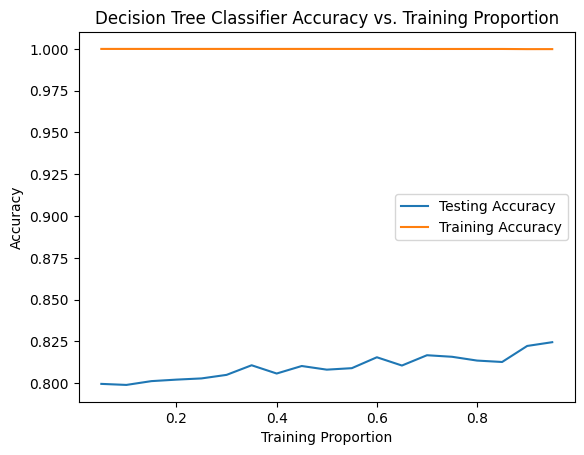

In [46]:
# Experiment 3-B
# Varying the proportion of training data which is used to train the model
# The proportion of training data will be varied from 5% to 95% in 5% increments
# The testing data will be the remaining data not used for training, varying from
# 95% to 5% in 5% increments. 
# The resulting accuracy will be plotted against these proportions

class DataSet:
    def __init__(self, X_train, y_train, X_test, y_test):
        self.train_features = X_train
        self.train_labels = y_train
        self.test_features = X_test
        self.test_labels = y_test

# The proportion of training data, 5% increments
training_proportions = [0.05*x for x in range(1, 20)]

# Round each of the training proportions to 2 decimal places
for i in range(len(training_proportions)):
    training_proportions[i] = round(training_proportions[i], 2)


# Partition the input data according to the training_proportions
data_sets = []
for p in training_proportions:
    X_train, y_train, X_test, y_test = split_dataset(p)
    data_sets.append(DataSet(X_train, y_train, X_test, y_test))\

print(training_proportions)

# Train a decision tree classifier on each of the datasets
# All  parameters will be left at their default values
dtc_list = []
for i in range(len(data_sets)):
    dtc_list.append(DecisionTreeClassifier(
                                    criterion="gini",              # gini, entropy, log_loss
                                    splitter="best",               # best, random
                                    max_depth= None,               # default None
                                    min_samples_split=2,           # default 2
                                    min_samples_leaf=1,            # default 1
                                    min_weight_fraction_leaf=0.0,  # default 0.0
                                    max_features=None,             # default None
                                    random_state=None,             # default None
                                    max_leaf_nodes=None,           # default None
                                    min_impurity_decrease=0.0,     # default 0.0
                                    class_weight=None,             # default None
                                    ccp_alpha=0.0)                  # default 0.0
                    )
    dtc_list[i].fit(data_sets[i].train_features, data_sets[i].train_labels)

# Measure the accuracy of each decision tree classifier on the testing data
accuracy_list = []
for i in range(len(dtc_list)):
    accuracy_list.append(dtc_list[i].score(data_sets[i].test_features, data_sets[i].test_labels))

# Measure the accuracy of each classifier on the training data
training_accuracy_list = []
for i in range(len(dtc_list)):
    training_accuracy_list.append(dtc_list[i].score(data_sets[i].train_features, data_sets[i].train_labels))

# Plot both testing and training accuracy  of each classifier against min_samples_split
plt.plot(training_proportions, accuracy_list, label="Testing Accuracy")
plt.plot(training_proportions, training_accuracy_list, label="Training Accuracy")
plt.title("Decision Tree Classifier Accuracy vs. Training Proportion")
plt.xlabel("Training Proportion")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



A DTC model seems to be overfitting when allowed to go to an artibrary depth, no matter the size of the training set (I had expected larger training sets to be harder to over-fit to. Perhaps limiting the depth would yield this result). However, as expected, the testing accuracy does increase as the size of the training set increases.

In [54]:
# Experiment 4: Varying Misc. Parameters
# The purpose of this experiment is to see if we can increase the performance of the
# decision tree classifier by varying the misc. parameters
# We will use an 80% training, 20% testing split for this experiment

# Split the data into training and testing sets
X_train, y_train, X_test, y_test = split_dataset(0.8)

# Compare entropy, gini, and log_loss impurity metrics
gini_dtc = DecisionTreeClassifier(criterion="gini", ccp_alpha=0.0001)
entropy_dtc = DecisionTreeClassifier(criterion="entropy", ccp_alpha=0.0001)
log_loss_dtc = DecisionTreeClassifier(criterion="log_loss", ccp_alpha=0.0001)

gini_dtc.fit(X_train, y_train)
entropy_dtc.fit(X_train, y_train)
log_loss_dtc.fit(X_train, y_train)

# Test accuracy
gini_accuracy = gini_dtc.score(X_test, y_test)
entropy_accuracy = entropy_dtc.score(X_test, y_test)
log_loss_accuracy = log_loss_dtc.score(X_test, y_test)

# train accuracy
gini_train_accuracy = gini_dtc.score(X_train, y_train)
entropy_train_accuracy = entropy_dtc.score(X_train, y_train)
log_loss_train_accuracy = log_loss_dtc.score(X_train, y_train)


# print the results
print("Gini Train Accuracy: ", gini_train_accuracy)
print("Entropy Train Accuracy: ", entropy_train_accuracy)
print("Log Loss Train Accuracy: ", log_loss_train_accuracy)
print()
print("Gini Accuracy: ", gini_accuracy)
print("Entropy Accuracy: ", entropy_accuracy)
print("Log Loss Accuracy: ", log_loss_accuracy)



Gini Train Accuracy:  0.8694474389805678
Entropy Train Accuracy:  0.911877712358681
Log Loss Train Accuracy:  0.911490726151975

Gini Accuracy:  0.8568269762299613
Entropy Accuracy:  0.8400221116639027
Log Loss Accuracy:  0.8395798783858486


Entropy and log loss metric appear to perform better during training, but must be more sensitive to overfitting, because even with some post-pruning, both metrics have worse testing performance than Gini. It makes sense that Gini is the default metric.

In [71]:
# Experiment 5
# The below DTC parameters were varied until the best possible accuracy was achieved

# Split the data into training and testing sets


best_dtc = DecisionTreeClassifier(criterion="gini",            # gini, entropy, log_loss
                                splitter="best",               # best, random
                                max_depth=None,               # default None
                                min_samples_split=2,           # default 2
                                min_samples_leaf=1,            # default 1
                                min_weight_fraction_leaf=0.0,  # default 0.0
                                max_features=None,             # default None
                                random_state=None,             # default None
                                max_leaf_nodes=None,           # default None
                                min_impurity_decrease=0.0,     # default 0.0
                                class_weight=None,             # default None
                                ccp_alpha=0.0001)              # default 0.0

# collect accuracies to compute average
test_accuracies = []
train_accuracies = []

# Run the experiment 100 times
for i in range(50):
    X_train, y_train, X_test, y_test = split_dataset(0.9)
    best_dtc.fit(X_train, y_train)
    test_accuracies.append(best_dtc.score(X_test, y_test))
    train_accuracies.append(best_dtc.score(X_train, y_train))

# print the average results
print("Average Training Accuracy: ", sum(train_accuracies)/len(train_accuracies))
print("Average Testing Accuracy: ", sum(test_accuracies)/len(test_accuracies))




Average Training Accuracy:  0.86733678960171
Average Testing Accuracy:  0.8601812956002653
